In [1]:
import os 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sql_functions import read_query

In [2]:
query = 'select * from customers limit 4;'
read_query(query)

,CustomerID,FirstName,LastName,Email,Phone,Address,State
0,C-2023-100-1,Mahika,Sunder,MahikaSunder_11@zmail.com,03412176590,"H.No. 155, Chana",Assam
1,C-2023-100-10,Zeeshan,Vasa,ZeeshanVasa_1@zmail.com,+911151051656,"52, Roy Nagar",Tripura
2,C-2023-100-100,Aaina,Sachdeva,AainaSachdeva_9@zmail.com,+918834507719,"75/92, Kade Marg",Nagaland
3,C-2023-100-101,Shray,Bajwa,ShrayBajwa_11@zmail.com,07410498662,"45, Bora Ganj",Manipur


In [3]:
query = 'show tables;'
read_query(query)

,Tables_in_swiftmarket
0,categories
1,customers
2,employees
3,salesdata
4,subcategories
5,suppliers


In [4]:
query = """Select * from salesdata limit 3;"""
read_query(query)



,SaleID,CustomerID,SubcatID,EmployeeID,SaleDate,Quantity,TotalPrice
0,23000,C-2023-100-12,6002,1100,2023-05-02,2,176432.00
1,23001,C-2023-100-141,6029,1115,2023-12-26,2,47172.00
2,23002,C-2023-100-86,6029,1035,2023-03-26,2,47172.00


In [5]:
query = """Select s.customerid, c.firstname,s.saledate,s.totalprice
from salesdata s
join customers c
on s.customerid = c.customerid
limit 5;"""

read_query(query)

,customerid,firstname,saledate,totalprice
0,C-2023-100-1,Mahika,2023-07-22,67312.00
1,C-2023-100-1,Mahika,2023-05-23,176466.00
2,C-2023-100-1,Mahika,2023-11-26,190332.00
3,C-2023-100-1,Mahika,2023-03-31,205080.00
4,C-2023-100-1,Mahika,2023-11-22,14174.00


In [3]:
# Q.Get the top names of the highest purchasers customer's name of a whole year

query = """
Select t.customerid,c.firstname,t.expenditure
from 
(Select customerid,
sum(totalprice) as expenditure
from salesdata 
group by customerid) t
join customers c
on t.customerid=c.customerid
order by t.expenditure desc
limit 10; """


top_annual_customers = read_query(query)

In [4]:
top_annual_customers

,customerid,firstname,expenditure
0,C-2023-100-13,Veer,13016064.00
1,C-2023-100-94,Priyansh,12629337.00
2,C-2023-100-57,Riya,12599608.00
3,C-2023-100-58,Vanya,12455437.00
4,C-2023-100-88,Dhruv,12280916.00
5,C-2023-100-165,Tarini,12130487.00
6,C-2023-100-197,Yuvraj,11868602.00
7,C-2023-100-199,Rhea,11704275.00
8,C-2023-100-196,Darshit,11520699.00
9,C-2023-100-75,Prerak,11442527.00


In [5]:
top_annual_customers['expenditure'].values

array([Decimal('13016064.00'), Decimal('12629337.00'),
       Decimal('12599608.00'), Decimal('12455437.00'),
       Decimal('12280916.00'), Decimal('12130487.00'),
       Decimal('11868602.00'), Decimal('11704275.00'),
       Decimal('11520699.00'), Decimal('11442527.00')], dtype=object)

In [6]:
top_annual_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customerid   10 non-null     object
 1   firstname    10 non-null     object
 2   expenditure  10 non-null     object
dtypes: object(3)
memory usage: 372.0+ bytes


In [7]:
# need to change the datatype of the expentiure onject into numbers (float or int)

top_annual_customers['expenditure'] = top_annual_customers['expenditure'].astype(float)


In [8]:
top_annual_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customerid   10 non-null     object 
 1   firstname    10 non-null     object 
 2   expenditure  10 non-null     float64
dtypes: float64(1), object(2)
memory usage: 372.0+ bytes


In [9]:
customer_names = top_annual_customers['firstname'].values

In [10]:
customer_exp = top_annual_customers['expenditure'].values

In [11]:
customer_names

array(['Veer', 'Priyansh', 'Riya', 'Vanya', 'Dhruv', 'Tarini', 'Yuvraj ',
       'Rhea', 'Darshit', 'Prerak'], dtype=object)

In [12]:
customer_exp

array([13016064., 12629337., 12599608., 12455437., 12280916., 12130487.,
       11868602., 11704275., 11520699., 11442527.])

In [13]:
cmap_val = np.linspace(0.3,1,10)

In [14]:
cmap=plt.cm.PuBuGn(cmap_val)

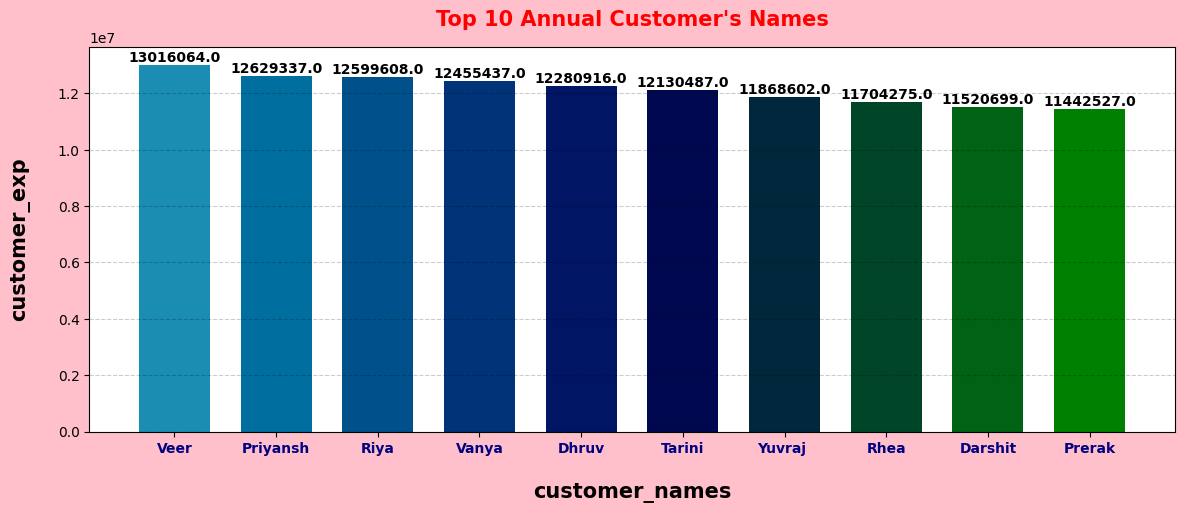

In [108]:
# customize the figure size
plt.figure(figsize=(14,5),facecolor='pink')

# ploting bar graph
plt.bar(x=customer_names,height =customer_exp,color= cmap,width=0.7)

# giving title to the graph
plt.title("Top 10 Annual Customer's Names",pad=15, size=15,color='red',fontweight='bold')

# using cmap
#cmap = plt.cm.Greens(np.linspace(0.5,1),len(customer_names))

# giving labels to the grapg
plt.xlabel('customer_names',labelpad=20, color='black', size=15,fontweight='bold')
plt.ylabel('customer_exp',labelpad=20, c='black',size=15,fontweight='bold')


plt.xticks(c='#000080',fontweight='bold')

# applying grid
plt.grid(axis='y',alpha=0.2,color='black',ls='dashed')


# using anotation
for i in range(len(top_annual_customers)):
    plt.annotate(text=customer_exp[i],xy=(i,customer_exp[i]),fontweight='bold',
                 horizontalalignment='center',# center,right,left
                 verticalalignment='bottom') # top,bottom, center



plt.show()

In [17]:
1e6

1000000.0

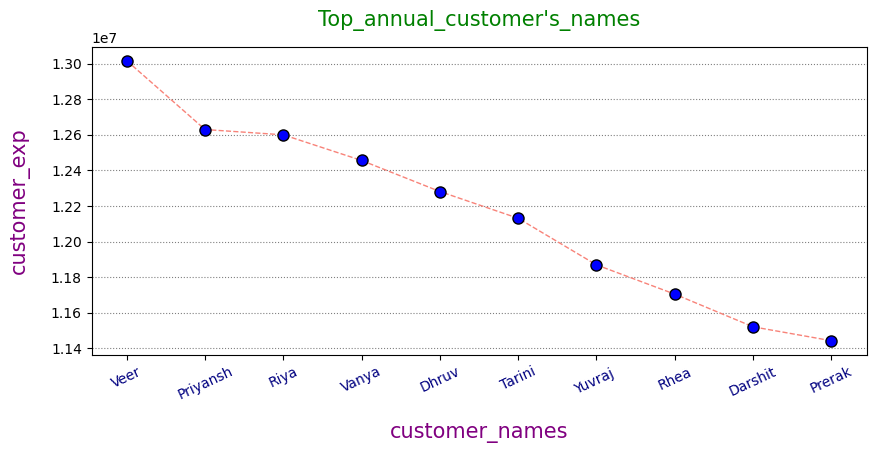

In [17]:
plt.figure(figsize=(10,4))

plt.plot(customer_names,customer_exp,color='#F88379',linestyle='dashed',marker='o',markeredgecolor='black',markersize = 8,mfc='blue',lw = 1) 

plt.title("Top_annual_customer's_names",pad=15, size=15,color='green')

plt.xlabel('customer_names',labelpad=15, color='purple', size=15)
plt.ylabel('customer_exp',labelpad=15, c='purple',size=15)

plt.xticks(rotation = 25,c='#000080')

plt.grid(axis='y',alpha=0.5,color='black',ls='dotted')


plt.show()

In [25]:
query = 'show tables;'
read_query(query) 

,Tables_in_swiftmarket
0,categories
1,customers
2,employees
3,salesdata
4,subcategories
5,suppliers


In [26]:
query = 'select * from salesdata limit 10;'
read_query(query)

,SaleID,CustomerID,SubcatID,EmployeeID,SaleDate,Quantity,TotalPrice
0,23000,C-2023-100-12,6002,1100,2023-05-02,2,176432.00
1,23001,C-2023-100-141,6029,1115,2023-12-26,2,47172.00
2,23002,C-2023-100-86,6029,1035,2023-03-26,2,47172.00
3,23003,C-2023-100-72,6006,1016,2023-08-01,2,117644.00
4,23004,C-2023-100-142,6030,1067,2023-03-06,5,336560.00
5,23005,C-2023-100-72,6015,1012,2023-11-22,5,396935.00
6,23006,C-2023-100-78,6015,1044,2023-10-26,5,396935.00
7,23007,C-2023-100-36,6017,1018,2023-03-29,5,295510.00
8,23008,C-2023-100-147,6030,1049,2023-01-17,3,201936.00
9,23009,C-2023-100-7,6019,1047,2023-07-19,4,56188.00


In [2]:
query = """select 
    monthname(s.saledate ) as monthnames,
    e.firstname,
    sum(s.totalprice) as totalsales
from salesdata s
    join employees e
    on s.employeeid=e.employeeid
where monthname(saledate) = 'January'
group by  monthname(s.saledate ),e.firstname
order by totalsales desc
limit 10; """

df = read_query(query=query)

In [3]:
df

,monthnames,firstname,totalsales
0,January,Bhavin,5775952.00
1,January,Nitara,5567036.00
2,January,Myra,4888628.00
3,January,Renee,3924716.00
4,January,Shray,3719152.00
5,January,Yuvaan,3348039.00
6,January,Anika,3152408.00
7,January,Kiaan,3136727.00
8,January,Yasmin,3135779.00
9,January,Hiran,3104523.00


In [4]:
df['totalsales'] = df['totalsales'].astype(float)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   monthnames  10 non-null     object 
 1   firstname   10 non-null     object 
 2   totalsales  10 non-null     float64
dtypes: float64(1), object(2)
memory usage: 372.0+ bytes


In [6]:
emp_names = df['firstname'].values

In [7]:
emp_names

array(['Bhavin', 'Nitara', 'Myra', 'Renee', 'Shray', 'Yuvaan', 'Anika',
       'Kiaan', 'Yasmin', 'Hiran'], dtype=object)

In [8]:
Total_sales = df['totalsales'].values

In [9]:
Total_sales

array([5775952., 5567036., 4888628., 3924716., 3719152., 3348039.,
       3152408., 3136727., 3135779., 3104523.])

In [10]:
cmap_val = np.linspace(0.3,1,10)

In [11]:
cmap=plt.cm.ocean_r(cmap_val)

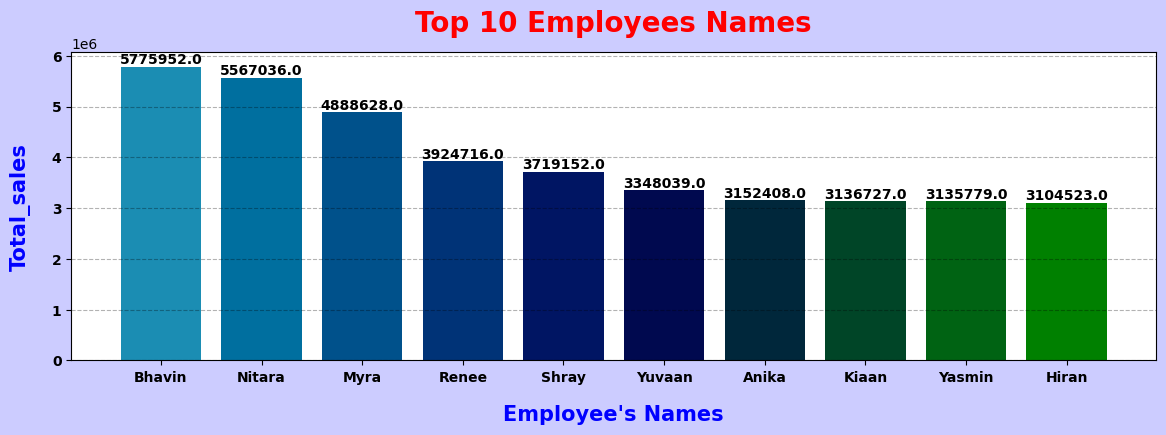

In [15]:
# creating cmap
cmap_val = np.linspace(0.3,1,10)
cmap=plt.cm.ocean_r(cmap_val)

# customize the figure size
plt.figure(figsize=(14,4),facecolor='#CCCCFF')

# ploting the bar graph
plt.bar(height=Total_sales,x=emp_names,color=cmap)

# giving title to the grapg
plt.title('Top 10 Employees Names', c = 'red', pad=15 ,size=20,fontweight='bold')


# labeling to the x and y labels 
plt.xlabel('Employee\'s Names',labelpad=15,c='blue',size=15,fontweight='bold')
plt.ylabel('Total_sales',labelpad=15,c='blue',size=15,fontweight='bold')


# using anotation
for i in range(len(df)):
    plt.annotate(text=Total_sales[i],xy=(i,Total_sales[i]),fontweight='bold',
                 horizontalalignment='center',# center,right,left
                 verticalalignment='bottom') # top,bottom, center
    

# using ticks
plt.xticks(c='black',fontweight='bold')
plt.yticks(c='black',fontweight='bold')

# applying grid
plt.grid(axis='y',alpha=0.3,color='black',ls='dashed')


plt.show()